<a href="https://colab.research.google.com/github/alirezarahimi1393/Neural-Nets-and-Deep-Learning/blob/master/Copy_of_First_homework_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision -U

In [ ]:
import torch, random
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.models import inception_v3
import torch.optim as optim



from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the transformations to apply to the images

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])


In [ ]:
#Downlaoding the CIFAR - 10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

#Downloading the CIFAR-10 test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

model = inception_v3(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)



100%|██████████| 170498071/170498071 [00:02<00:00, 81235841.93it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 102MB/s] 


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#Training the Dataset
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(5):
  running_loss =0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs[0], labels)
    loss.backward()
    optimizer.step()
    running_loss +=loss.item()
    if i % 100 ==99:
     print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss / 100))
     running_loss = 0.0
print('Finished Training')

# for epoch in range(5):
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         inputs, labels = data[0].to(device), data[1].to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs[0], labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#         if i % 100 == 99:
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 100))
#             running_loss = 0.0

# print('Finished Training')


[1,   100] loss: 0.068
[1,   200] loss: 0.065
[1,   300] loss: 0.070
[1,   400] loss: 0.064
[1,   500] loss: 0.086
[1,   600] loss: 0.091
[1,   700] loss: 0.067
[1,   800] loss: 0.073
[1,   900] loss: 0.094
[1,  1000] loss: 0.065
[1,  1100] loss: 0.074
[1,  1200] loss: 0.081
[1,  1300] loss: 0.067
[1,  1400] loss: 0.066
[1,  1500] loss: 0.078
[2,   100] loss: 0.048
[2,   200] loss: 0.043
[2,   300] loss: 0.039
[2,   400] loss: 0.044
[2,   500] loss: 0.044
[2,   600] loss: 0.039
[2,   700] loss: 0.049
[2,   800] loss: 0.048
[2,   900] loss: 0.044
[2,  1000] loss: 0.052
[2,  1100] loss: 0.038
[2,  1200] loss: 0.041
[2,  1300] loss: 0.047
[2,  1400] loss: 0.054
[2,  1500] loss: 0.048
[3,   100] loss: 0.030
[3,   200] loss: 0.033
[3,   300] loss: 0.027
[3,   400] loss: 0.021
[3,   500] loss: 0.024
[3,   600] loss: 0.023
[3,   700] loss: 0.028
[3,   800] loss: 0.035
[3,   900] loss: 0.019
[3,  1000] loss: 0.028
[3,  1100] loss: 0.027
[3,  1200] loss: 0.025
[3,  1300] loss: 0.028
[3,  1400] 

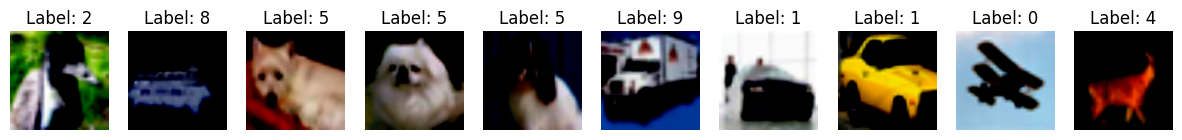

In [ ]:
# # Visualize a few samples from the dataset
# num_samples = 10  # Number of samples to visualize
# fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))

# for i in range(num_samples):
#     sample, label = train_dataset[i]  # Get a sample and label from the dataset
#     image = sample.permute(1, 2, 0) if sample.dim() == 3 else sample  # Permute dimensions for image visualization
#     axs[i].imshow(image)
#     axs[i].axis('off')
#     axs[i].set_title(f"Label: {label}")

# plt.show()


num_samples = 10
fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))
i = random.randint(1, 100)
for i in range(num_samples):
  random_index = random.randint(0, len(train_dataset) - 1)  # Generate a random index
  sample, label = train_dataset[random_index]  # Select a random sample from the dataset
  image = sample.permute(1, 2, 0) if sample.dim() == 3 else sample
  axs[i].imshow(image)
  axs[i].axis('off')
  axs[i].set_title(f"Label: {label}")
plt.show()
